#ML MODEL TO PREDICT RUNS AT END OF 6 OVERS IN AN IPL MATCH

In [ ]:
import pandas as pd

##Importing Data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ipl_data=pd.read_csv("gdrive/My Drive/IPL/all_matches.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ipl_data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,AD Russell,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need data only till 6 overs

In [ ]:
ipl_data.drop(ipl_data.index[ipl_data["ball"]>6], axis=0, inplace=True)

We find the total runs and drop the "runs_off_bat" and "extras" column

In [ ]:
ipl_data['total_runs']=ipl_data['runs_off_bat']+ipl_data['extras']
ipl_data=ipl_data.drop(columns=['runs_off_bat','extras'])

In [ ]:
text_feature=[feature for feature in ipl_data.columns if ipl_data[feature].dtypes=='O']

In [ ]:
text_feature

['season',
 'start_date',
 'venue',
 'batting_team',
 'bowling_team',
 'striker',
 'non_striker',
 'bowler',
 'wicket_type',
 'player_dismissed']

We have so much text data, that need to be converted into numericals...
So, I use a technique of calculating the average and repalcing the text with the average.
For example to replace the text value of "MA Chidambaram", I calculated the average runs in "MA Chidambaram" from ipl_data and put it there. 

I will show how I did this for venue column and remaining is self explanaotry

##**Venue Average Calculations**





For counting total matches

In [ ]:
x=ipl_data[ipl_data['ball']==5.6]
x=x[x['innings']==1]
a=x.pivot_table(index=['venue'],aggfunc='size')
a=a.reset_index()
a=a.rename(columns={0:'total_matches'})

In [ ]:
a

,venue,total_matches
0,Arun Jaitley Stadium,14
1,Barabati Stadium,7
2,Brabourne Stadium,11
3,Buffalo Park,3
4,De Beers Diamond Oval,3
5,Dr DY Patil Sports Academy,17
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,13
7,Dubai International Cricket Stadium,33
8,Eden Gardens,77
9,Feroz Shah Kotla,60


To get total runs

In [ ]:
venue=ipl_data.groupby(['venue']).total_runs.sum()
venue=venue.reset_index()

In [ ]:
venue

,venue,total_runs
0,Arun Jaitley Stadium,1436
1,Barabati Stadium,610
2,Brabourne Stadium,1141
3,Buffalo Park,237
4,De Beers Diamond Oval,240
5,Dr DY Patil Sports Academy,1439
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1065
7,Dubai International Cricket Stadium,3010
8,Eden Gardens,7125
9,Feroz Shah Kotla,5604


I saw same stadium name was getting repeated so we changed them manually..I am not showing it here

Next we did same and calculated averages of all columns

I will show the final dataset after caluclating averages and replacing tex with averages...

In [ ]:
model_data=pd.read_csv("gdrive/My Drive/IPL/model_data.csv")

In [ ]:
model_data.describe()

,bowler,match_id,venue,batting_team,bowling_team,innings,striker
count,1664.000000,1.664000e+03,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000
mean,44.582790,7.612540e+05,45.975359,46.237337,46.239502,1.535457,14.052819
std,3.844133,3.077864e+05,2.666010,1.440206,1.684503,0.575041,2.306982
min,34.414752,3.359820e+05,33.500000,42.111111,42.357143,1.000000,4.673077
25%,42.023306,5.012298e+05,45.606061,45.523316,45.536585,1.000000,12.450521
50%,44.100323,7.293070e+05,46.266234,45.753695,46.552083,2.000000,14.130836
75%,46.718477,1.082632e+06,46.775000,47.126316,47.375000,2.000000,15.647586
max,72.213481,1.254060e+06,56.150000,51.966667,52.000000,6.000000,20.833333


For batsmen I took the averages of all batsmen involved and for bowler I used the average of runs per ball multiplied by 36 

Some more preparation before putting into ML model.
1. Found total runs which is our target variable and merged with model_data.
2. Reordered the columns for convenience
3. changed column name: "striker" TO "batemen"
4. Dropped Match_id

innings can"t have values greater than 2

In [ ]:
model_data['innings'] = np.where(model_data['innings']>2,1,model_data['innings'])

In [ ]:
k=ipl_data.groupby(['match_id','innings']).total_runs.sum()
k=k.reset_index()
k=k.drop(columns=['match_id','innings'])
model_data=model_data[['match_id','innings','venue','batting_team','bowling_team','striker','bowler']]
model_data=model_data.merge(k,left_index=True,right_index=True)
model_data=model_data.rename(columns={'striker':'batsmen'})
model_data=model_data.drop(columns=["match_id"])

In [ ]:
model_data

,innings,venue,batting_team,bowling_team,batsmen,bowler,total_runs
0,1,46.291139,46.895288,46.690722,11.301499,65.979901,61
1,2,46.291139,45.523316,46.552083,10.905102,46.563351,26
2,1,47.000000,45.195531,48.343915,17.246839,45.299813,53
3,2,47.000000,47.126316,46.022346,13.369048,53.292176,63
4,2,46.700000,46.000000,46.606250,16.654996,45.480269,40
...,...,...,...,...,...,...,...
1659,2,46.567797,45.523316,43.916667,11.557971,49.079310,46
1660,1,45.770270,45.195531,47.029412,13.084878,52.432452,33
1661,2,45.770270,48.176471,46.022346,16.191321,47.242827,65
1662,1,46.567797,46.895288,45.536585,12.825047,38.884243,50


##**DATA VISUALIZATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
visual_data=model_data.copy()

In [ ]:
discrete_feature=[feature for feature in visual_data.columns if len(visual_data[feature].unique())<50]
print("Discrete Variables: {}".format(discrete_feature))

Discrete Variables: ['innings', 'venue', 'batting_team', 'bowling_team']


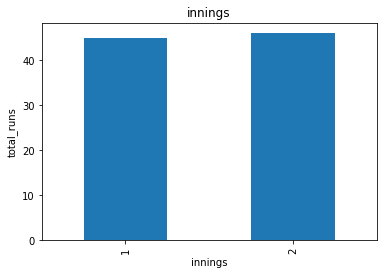

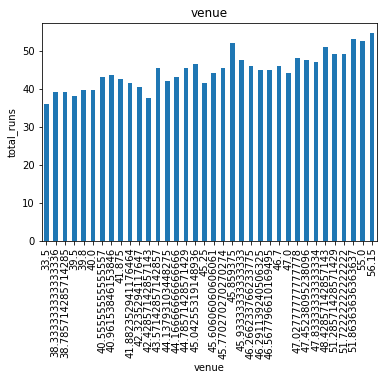

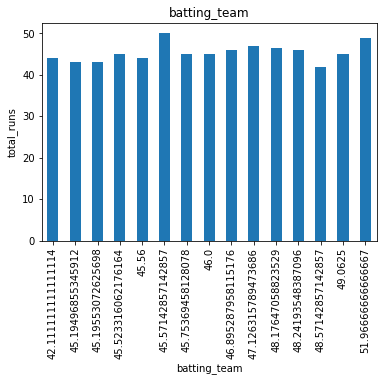

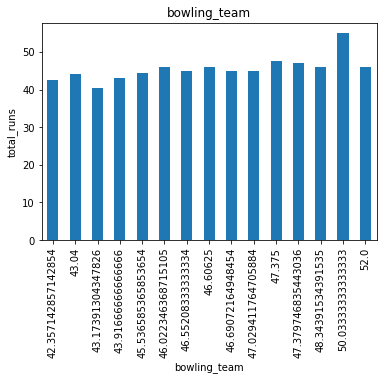

In [ ]:
for feature in discrete_feature:
    data=visual_data.copy()
    data.groupby(feature)['total_runs'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('total_runs')
    plt.title(feature)
    plt.show()

We saw how these data affected total runs

##**MACHINE LEARNING MODEL**

I am using random Forest Regressor

In [ ]:
import numpy as np

In [ ]:
dataset=model_data.copy()

In [ ]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

Separated dependent and independent variables

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Test-Train split

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Training

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.09185628742515
Mean Squared Error: 161.1920140718563
Root Mean Squared Error: 12.696141700211774


Obtained These Error values
